<a href="https://www.kaggle.com/code/georgistan/heart-disease-eda-and-prediction?scriptVersionId=167152121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Dataset


## Features description

Age: displays the age of the individual.

Sex: displays the gender of the individual: 1 = male, 0 = female.

Chest-pain type: type of chest-pain experienced by the individual: 1 = typical angina, 
2 = atypical angina, 
3 = non — anginal pain, 
4 = asymptotic.

Resting Blood Pressure: resting blood pressure value of an individual in mmHg (unit).

Serum Cholestrol: serum cholesterol in mg/dl (unit).

Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl: If fasting blood sugar > 120mg/dl then : 1 (true), else : 0 (false).

Resting ECG: resting electrocardiographic results: 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy.

Max heart rate achieved: max heart rate achieved by an individual.

Exercise induced angina: 1 = yes, 0 = no.

ST depression induced by exercise relative to rest: value (integer/float).

Peak exercise ST segment: 1 = upsloping, 2 = flat, 3 = downsloping.

Number of major vessels (0–3) colored by flourosopy: value (integer/float).

Thal: displays the thalassemia: 3 = normal, 6 = fixed defect, 7 = reversible defect.

Diagnosis of heart disease: individual suffering from heart disease or not: 0 = absence; 1, 2, 3, 4 = present.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Get the Data

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# extract feature names from the variables DataFrame
feature_names = heart_disease.variables['name'].tolist()

# create a DataFrame
heart_dis = pd.DataFrame(data = heart_disease.data.features, columns = feature_names)

# create a 'target' column with 'num' values
heart_dis['target'] = heart_disease.data.targets

# save DataFrame to CSV
heart_dis.to_csv('heart_disease_data.csv', index = False)

In [3]:
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,NaN,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,NaN,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,NaN,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,NaN,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,NaN,0


In [4]:
unique_values = heart_dis['target'].unique()
unique_values

array([0, 2, 1, 3, 4])

In [5]:
# drop the 'num' column from the features
heart_dis = heart_dis.drop(columns=['num'], errors='ignore')

heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
# check for missing values in the DataFrame
missing_values = heart_dis.isnull().sum()

# count of missing values for each column
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
# identify rows with missing values in 'ca' and 'thal' columns
missing_rows_ca = heart_dis[heart_dis['ca'].isnull()]
missing_rows_thal = heart_dis[heart_dis['thal'].isnull()]

# display the rows with missing values
print("Rows with missing 'ca' values:")
print(missing_rows_ca)

print("\nRows with missing 'thal' values:")
print(missing_rows_thal)

Rows with missing 'ca' values:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
166      1 NaN   3.0       0  
192      2 NaN   7.0       1  
287      2 NaN   7.0       0  
302      1 NaN   3.0       0  

Rows with missing 'thal' values:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
266   52    1   4       128   204    1        0      156      1      1.0   

     slope   ca  thal  target  
87       1  0.0   NaN       0  
266      2  0.0   NaN       2  


Patients 166, 287, 302 do not have heart disease, so I will impute the 'ca' values with the mean of the healthy patients.
For patient 192, I will change the ca value with the mean of those suffering from heart disease, stage 1.
In an analogue way, I will do the same for the 'thal' values.

In [8]:
# calculate the mean 'ca' value for rows with target 0
mean_ca_target_0 = heart_dis.loc[heart_dis['target'] == 0, 'ca'].mean()

# update 'ca' values for rows 166, 287, and 302 with the mean
rows_to_update = [166, 287, 302]
heart_dis.loc[rows_to_update, 'ca'] = heart_dis.loc[rows_to_update, 'ca'].fillna(mean_ca_target_0)

# verify that missing values have been filled
heart_dis.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        2
target      0
dtype: int64

In [9]:
# calculate the mean 'ca' values for rows with target 1
mean_ca_target_1 = heart_dis.loc[heart_dis['target'] == 1, 'ca'].mean()

# update 'ca' value for row 192 with the mean
heart_dis.loc[[192], 'ca'] = heart_dis.loc[[192], 'ca'].fillna(mean_ca_target_1)

heart_dis.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [10]:
# calculate the mean 'thal' values for rows with target 0
mean_thal_target_0 = heart_dis.loc[heart_dis['target'] == 0, 'thal'].mean()

# update 'thal' value for row 87 with the mean 
heart_dis.loc[[87], 'thal'] = heart_dis.loc[[87], 'thal'].fillna(mean_thal_target_0)

mean_thal_target_2 = heart_dis.loc[heart_dis['target'] == 2, 'thal'].mean()
heart_dis.loc[[266], 'thal'] = heart_dis.loc[[266], 'thal'].fillna(mean_thal_target_2)

heart_dis.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

In [11]:
# set targets of 2, 3, or 4 to 1 (heart disease present)
heart_dis['target'] = heart_dis.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [12]:
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
heart_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


There are 14 columns (features) and 303 rows (entries) in the dataset. There are no missing data (non null count matches the total number of entries). We'll proceed further with data visualization to understand the relationship between the variables.

In [14]:
heart_dis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.668517,4.735400,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.932059,1.935457,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


The mean age is 54, which is the usual age when heart disease starts to get pinpointed amongst patients, while the standard deviation for age is approximately of 9 years. The latter fact means that the ages in the dataset vary around the mean age (~ 54) by an average of 9 years - there is only some degree of spread/variability in the ages of individuals in the dataset. The distribution of the data tells us that the median age (50th percentile) is 56 years old, which means that half of the individuals in the dataset are younger. The interquartile range (IQR), which is a measure of statistical dispersion, tells us that regarding the age, this is between 48 and 61 years: 25% are aged <=48 y.o. and 25% are aged >= 61 y.o. Except for the sex column, the others columns represent categorical variables with discrete values.

## Data visualization

#### Scatter plot of age versus cholesterol levels, coloured by heart disease diagnosis.

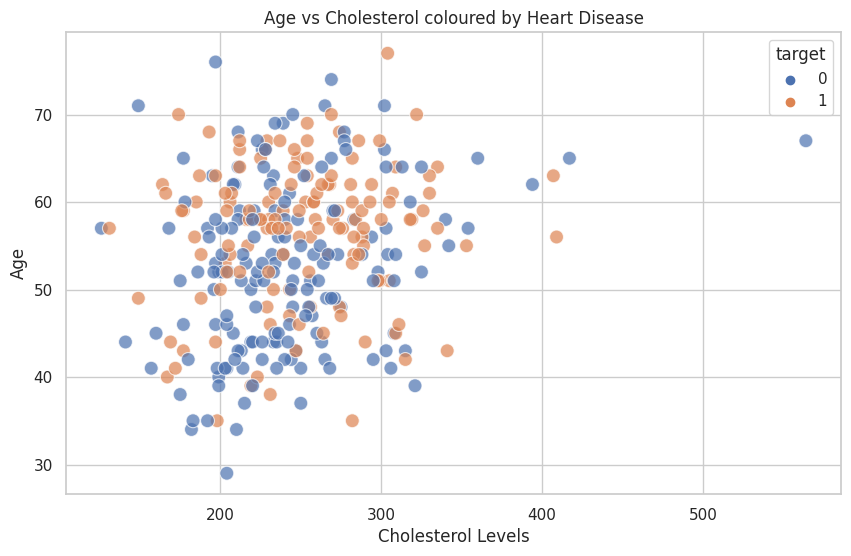

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for the plot
sns.set(style = 'whitegrid')

# create the scatter plot
plt.figure(figsize = (10, 6))
scatter_plot = sns.scatterplot(
    y = 'age',
    x = 'chol', 
    hue = 'target', 
    data = heart_dis,
    s = 100,
    alpha = 0.7)

# set the plot title and labels
plt.title('Age vs Cholesterol coloured by Heart Disease')
plt.ylabel('Age')
plt.xlabel('Cholesterol Levels')

plt.show()

We notice that as the age increses, there is a higher likelikhood of heart disease, as well as higher cholesterol levels. Nothing new under the sun so far.

#### Count plot to see if men are more likely to have heart disease, compared to women.

In [16]:
gender_counts = heart_dis['sex'].value_counts()

# Print the counts
print("Number of Females (0):", gender_counts[0])
print("Number of Males (1):", gender_counts[1])


Number of Females (0): 97
Number of Males (1): 206


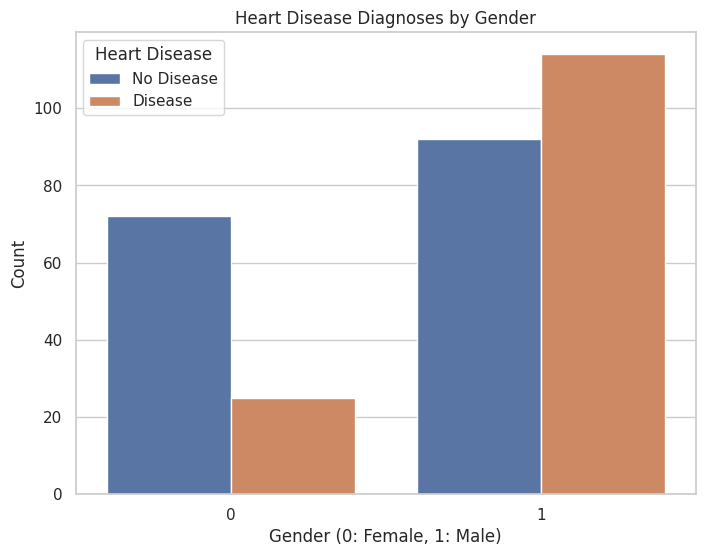

In [17]:
sns.set(style="whitegrid")


# count plot to compare heart disease diagnoses for men and women
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x = 'sex', hue = 'target', data = heart_dis)

plt.title('Heart Disease Diagnoses by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')

# legend
count_plot.legend(title = 'Heart Disease', labels = ['No Disease', 'Disease'])

# Show the plot
plt.show()

There are twice more men in the dataset than women. However, the counplot is pretty clear regarding that out of 97 women, only roughly 20 have heart disease (~20%), while out of 206 men, almost 120 have the diagnosis (>50%).

Let's see if a higher cholesterol level leads to a lower max heart rate, which would make sense given the higher viscosity of the circulating blood.

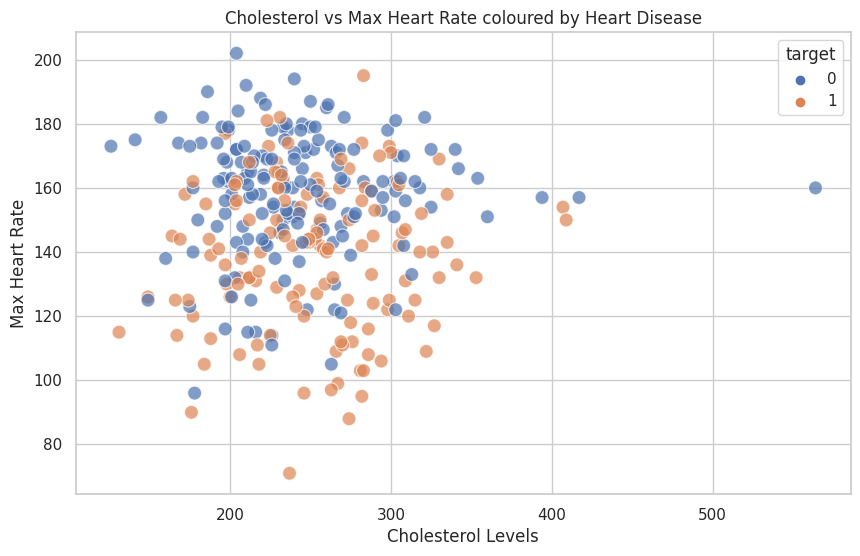

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for the plot
sns.set(style = 'whitegrid')

# create the scatter plot
plt.figure(figsize = (10, 6))
scatter_plot = sns.scatterplot(
    x = 'chol',
    y = 'thalach', 
    hue = 'target', 
    data = heart_dis,
    s = 100,
    alpha = 0.7)

# set the plot title and labels
plt.title('Cholesterol vs Max Heart Rate coloured by Heart Disease')
plt.ylabel('Max Heart Rate')
plt.xlabel('Cholesterol Levels')

plt.show()

Therefore, the presence of heart disease leads to not only higher cholesterol levels, but also a lower maximum heart rate. 

#### Now, let's see a heatmap of the correlations between heart disease and other variables like resting blood pressure (trestbps), fasting blood sugar (fbs), and exercise-induced angina (exang). This way, we can visualize pairwise correlations between variables. 

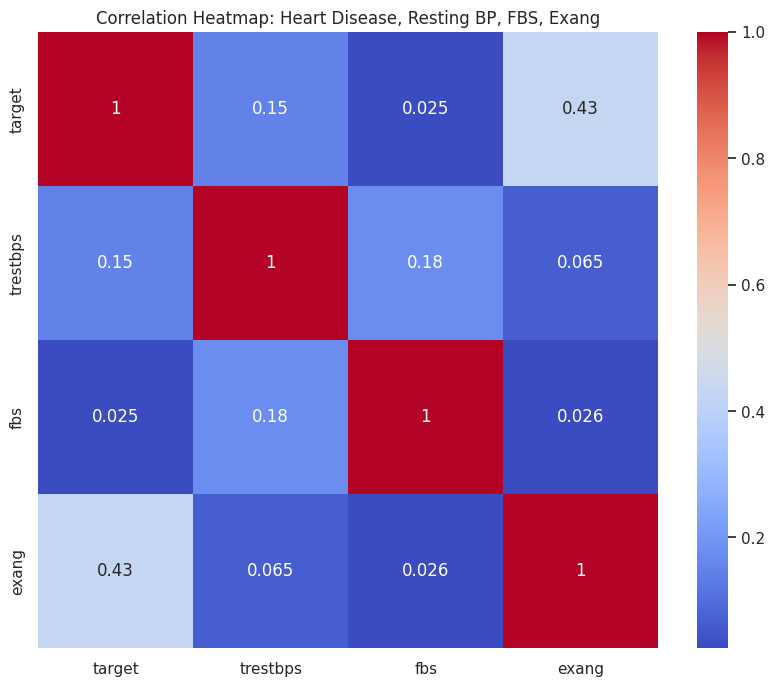

In [19]:
sns.set(style="whitegrid")

# select the relevant columns for correlation analysis
selected_columns = ['target', 'trestbps', 'fbs', 'exang']
correlation_data = heart_dis[selected_columns]

# calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title('Correlation Heatmap: Heart Disease, Resting BP, FBS, Exang')

plt.show()

The values in the heatmap range from -1 to 1, where:
- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.


Maybe the most important result from above is the fact that people with exercise-induced angina have a 43% of having heart disease. 

What about the 'ca' values which may suggest the severity of coronary artery disease. A higher number of major vessels colored may suggest a more prone coronary heart disease patient. As a reminder, the values for "ca" typically range from 0 to 3, where:
- 0: No major vessels colored (indicating potential absence of coronary artery disease).
- 1: One major vessel colored.
- 2: Two major vessels colored.
- 3: Three major vessels colored.

The ST segment of the ECG represents the period between ventricular depolarization and repolarization. In very simple terms, the ST segment corresponds to the time it takes for the heart's lower chambers (ventricles) to go through two important phases of their electrical activity - the ventricles receive an electrical signal that prompts them to contract and pump blood to the rest of the body and then, after the contraction, the ventricles need to reset their electrical state to prepare for the next heartbeat. 
It stands to reason that the electrical activity recorded during these phases may be an indicator of potential issues like ischemia or heart disease. 
#### Let's see what is the correlation between the ST segment and the ca values.

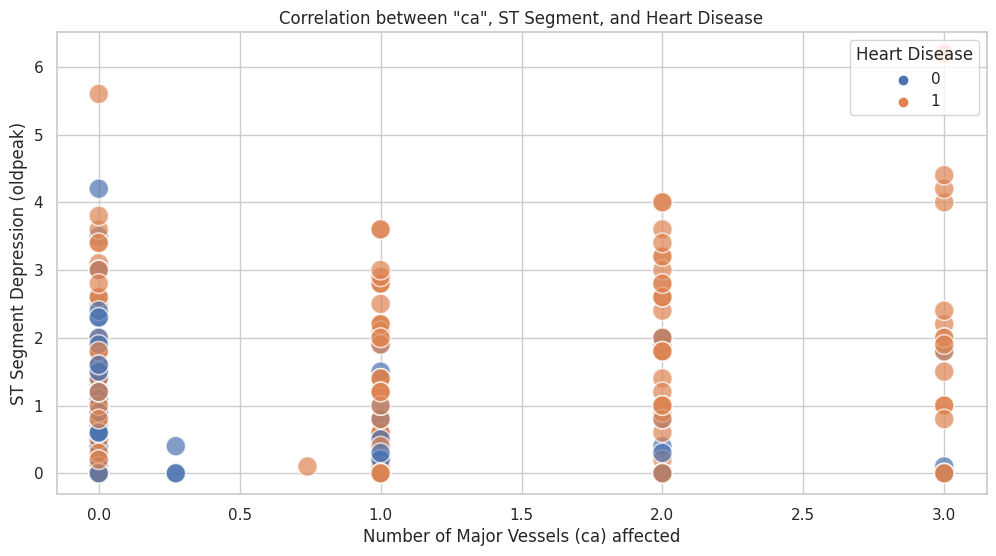

In [20]:
# scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'ca', y = 'oldpeak', hue  ='target', data = heart_dis, s = 200, alpha = 0.7)
plt.title('Correlation between "ca", ST Segment, and Heart Disease')
plt.xlabel('Number of Major Vessels (ca) affected')
plt.ylabel('ST Segment Depression (oldpeak)')
plt.legend(title =  'Heart Disease', loc = 'upper right')
plt.show()

In [21]:
heart_disease_counts = heart_dis['target'].value_counts()

print("Number of healthy patients (0):", heart_disease_counts[0])
print("Number of affected patients (1):", heart_disease_counts[1])


Number of healthy patients (0): 164
Number of affected patients (1): 139


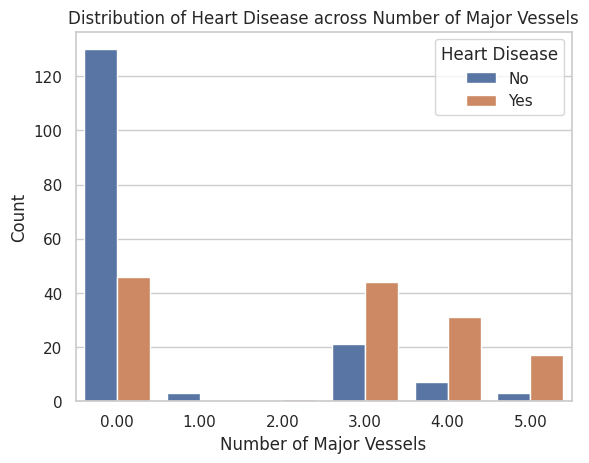

In [22]:
from matplotlib.ticker import FuncFormatter

# function to format x-axis values with at most two decimals
def format_decimals(x, pos):
    return f'{x:.2f}'

# countplot to visualize the distribution
sns.countplot(x = 'ca', hue = 'target', data = heart_dis)

plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease across Number of Major Vessels')

plt.legend(title = 'Heart Disease', labels = ['No', 'Yes'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_decimals))

plt.show()

0 on the x axis means that there are no significant blockages in the major vessels, and clearly there are more patients that do not have heart disease in this category. As we can see, more vessels affected mean a higher chance of heart disease. However, even people without abnormalities in their vessels have been diagnosed with heart disease.

#### Before moving on, let's see the distrbution of age given each target class.

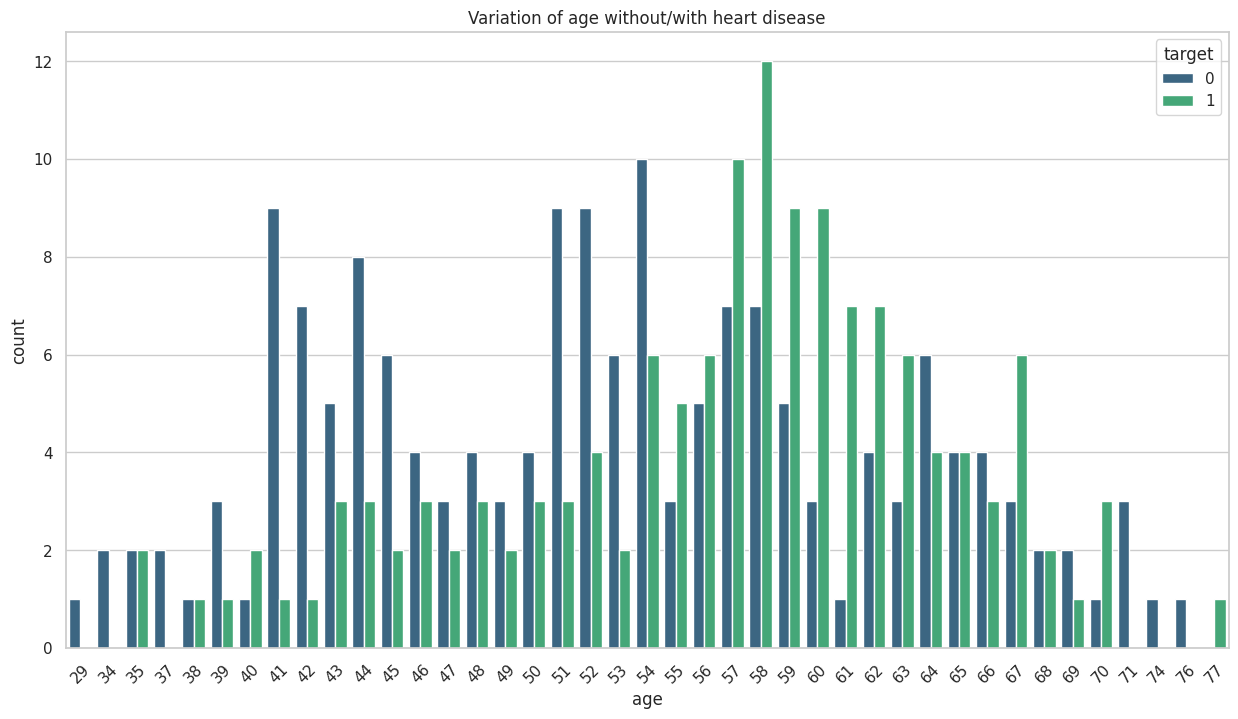

In [23]:
# countplot to visualize the variation of age for each target class
plt.figure(figsize=(15, 8))
sns.countplot(x = 'age', hue = 'target', data = heart_dis, palette='viridis')
plt.xticks(rotation = 45)  # rotate x-axis labels for better readability

plt.title('Variation of age without/with heart disease')

plt.show()


The most affected are, as we can see, those in their 50s and 60s (especially those of age 57 and 58). Most people over 50 years old seem to be suffering from heart disease, which also confirms one of the above theories, because a higher age means a lower max heart rate. 

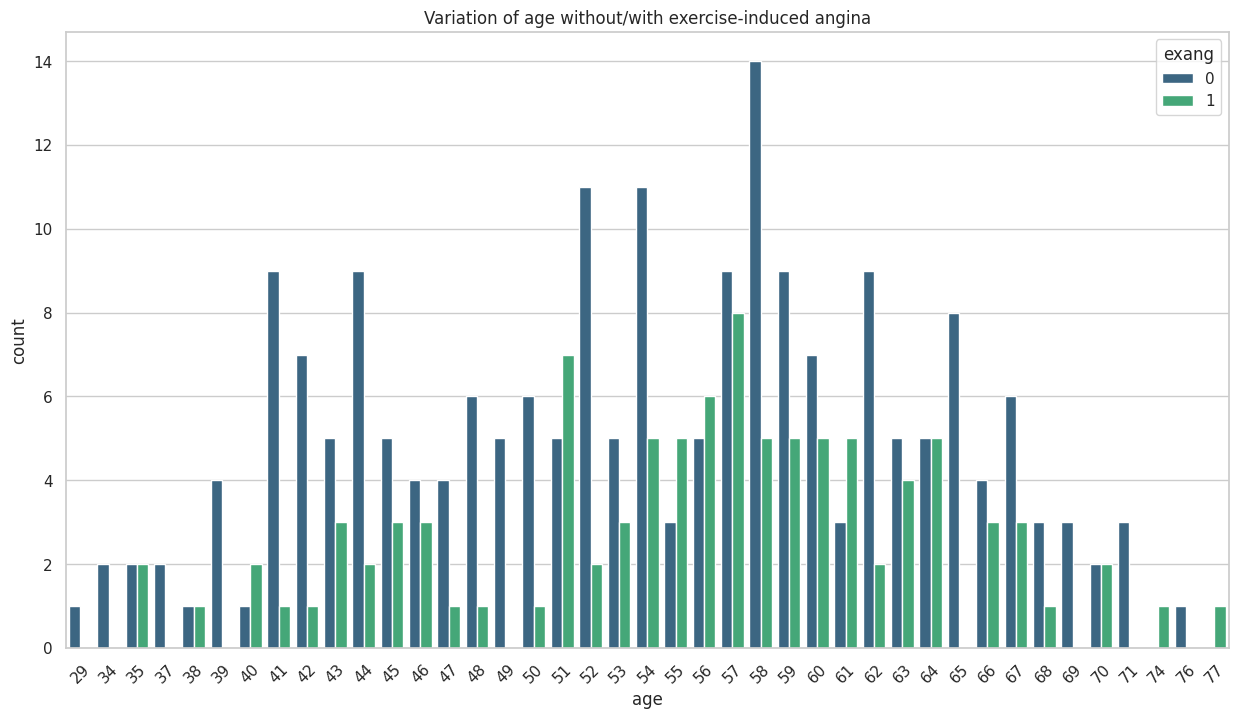

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'age', hue = 'exang', data = heart_dis, palette='viridis')
plt.xticks(rotation = 45)  # rotate x-axis labels for better readability

plt.title('Variation of age without/with exercise-induced angina')

plt.show()

Apparently, people over 50 years old, however more susceptible to heart disease, have a less likelohood of absent exercise-induced angina, which could mean that people may be not be aware of their health problems because not even exercise is an indicator of it.

Again, the values 3, 6, and 7 in the thal column correspond to different types of thalassemia:
- 3 (Normal): This indicates a normal condition without any significant thalassemia.
- 6 (Fixed Defect): This implies the presence of a fixed defect in the blood vessels, possibly indicating a more severe or permanent condition.
- 7 (Reversible Defect): This suggests a reversible defect in the blood vessels, meaning there might be a chance for improvement or reversal of the condition.


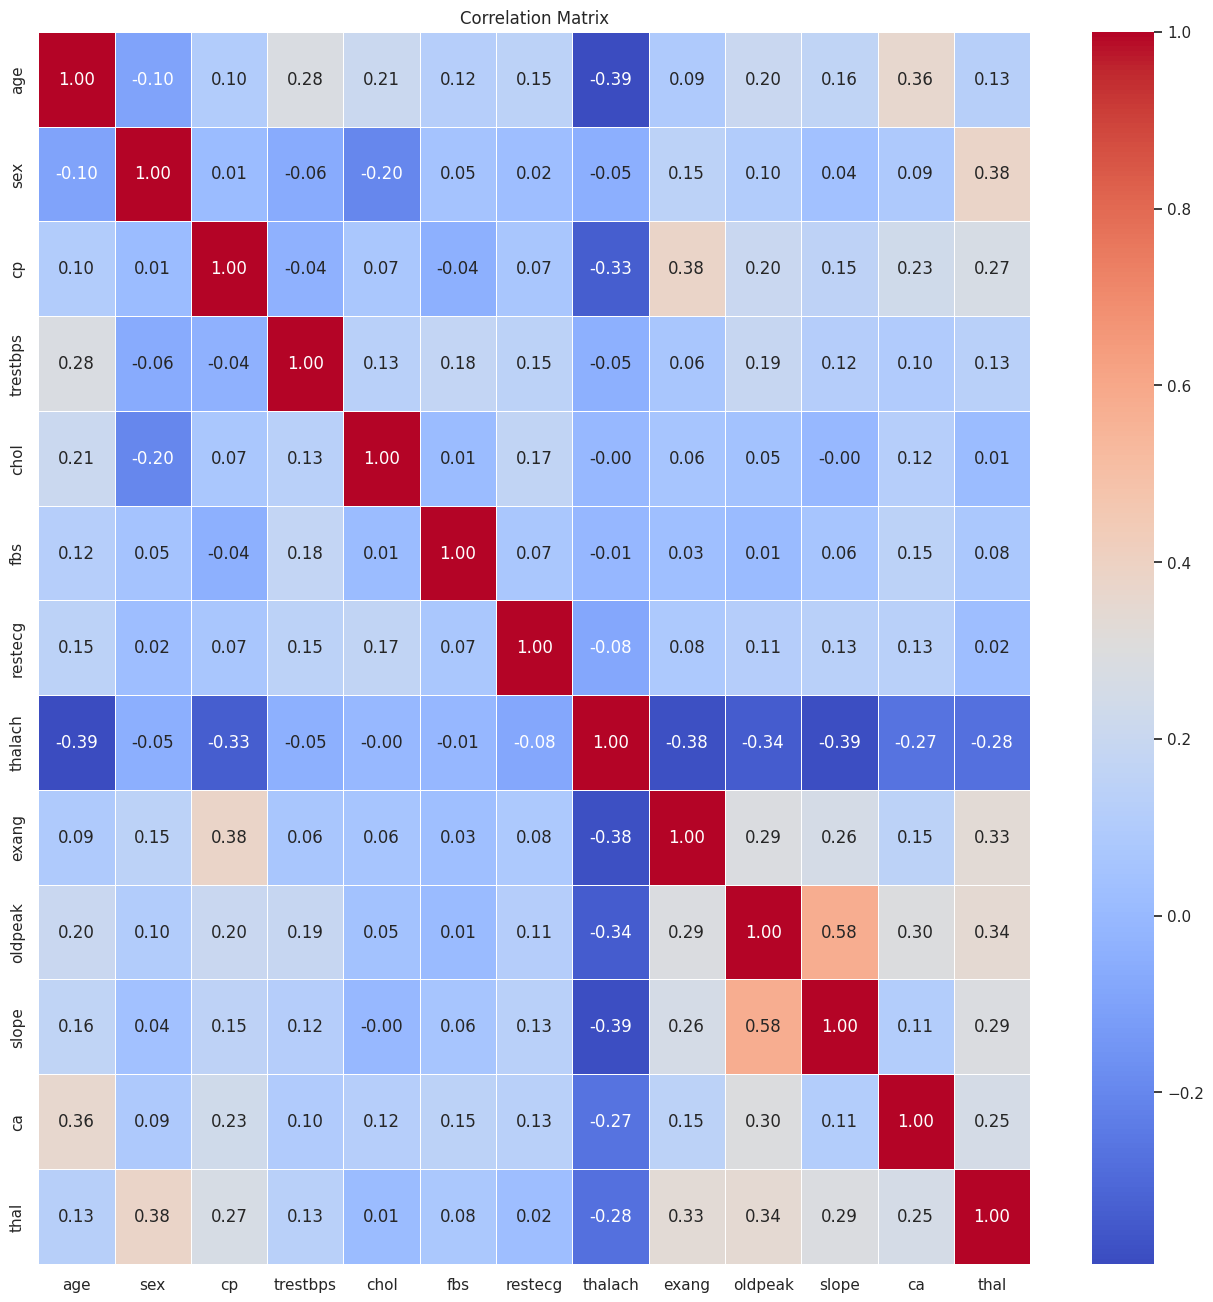

In [25]:
correlation_matrix = heart_dis[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation does not imply causation, but it makes sense to note that the ST deformation is impacted slightly by the thal values (if the thal value increases, the oldpeak may increase as well). 
What does not surprises me is the fact that the slope (the slope of the peak exercise ST segment) is pretty well correlated with the oldpeak. In other words, the "slope" variable describes the shape of the ST segment during peak exercise, providing information about the cardiac response to exertion. As the "oldpeak" (ST depression induced by exercise relative to rest) increases, there tends to be an increase in the "slope" of the peak exercise ST segment.
Conversely, as "oldpeak" decreases, there may be a tendency for the "slope" to decrease as well. 

## Data pre-processing

As I already computed the null values, we can get straight to dividing the data in the train and test sets.

I will use the following classification models for classification:
- SVM
- Random forest
- Logistic regression

The training set will be comprised of 80% of the data and the test set of 20%.

I will use the confusion matrix for evaluating the models.

In [26]:
X = heart_dis.iloc[:, : -1].values # all rows and all columns except the last one
y = heart_dis.iloc[:, -1].values # all rows and last column

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Training the model

## SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm_classifier = SVC(kernel = 'rbf') # use rbf to capture intricate relationships in the data
svm_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# predictions on the training set
y_pred_train = svm_classifier.predict(X_train)

# confusion matrices
conf_mat_test = confusion_matrix(y_test, y_pred_test)
conf_mat_train = confusion_matrix(y_train, y_pred_train)

# accuracy scores
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


print("Confusion Matrix, TEST Set:")
print(conf_mat_test)
print("\nAccuracy, TEST Set: {:.2%}".format(accuracy_test))
print("\nConfusion Matrix, TRAINING Set:")
print(conf_mat_train)
print("\nAccuracy, TRAINING Set: {:.2%}".format(accuracy_train))

Confusion Matrix, TEST Set:
[[28  7]
 [19  7]]

Accuracy, TEST Set: 57.38%

Confusion Matrix, TRAINING Set:
[[104  25]
 [ 55  58]]

Accuracy, TRAINING Set: 66.94%


Explanation of the SVM model results, based on the confusion matrix for the test set, we have:
- True Positive (TP): 7
- True Negative (TN): 28
- False Positive (FP): 7
- False Negative (FN): 19
So, the accuracy for the test set is calculated such that: 
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Accuracy = (7 + 28) / (28 + 7 + 19 + 7) ≈ 57.38%

Expectedly, the test set accuracy is lower than the training set accuracy. The model seems to have a higher accuracy on the training set, indicating that it might be overfitting to the training data.

Since SVM are sensitive to the scale of features, I will scale the variables. Thus, scaling may improve the convergence and accuracy of the SVM model.

In [29]:
from sklearn.preprocessing import MinMaxScaler

# standardize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm_classifier = SVC(kernel = 'rbf') # use rbf to capture intricate relationships in the data
svm_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# predictions on the training set
y_pred_train = svm_classifier.predict(X_train)

# confusion matrices
conf_mat_test = confusion_matrix(y_test, y_pred_test)
conf_mat_train = confusion_matrix(y_train, y_pred_train)

# accuracy scores
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


print("Confusion Matrix, TEST Set:")
print(conf_mat_test)
print("\nAccuracy, TEST Set: {:.2%}".format(accuracy_test))
print("\nConfusion Matrix, TRAINING Set:")
print(conf_mat_train)
print("\nAccuracy, TRAINING Set: {:.2%}".format(accuracy_train))

Confusion Matrix, TEST Set:
[[32  3]
 [ 9 17]]

Accuracy, TEST Set: 80.33%

Confusion Matrix, TRAINING Set:
[[118  11]
 [ 15  98]]

Accuracy, TRAINING Set: 89.26%


> As expected, the accuracy of the SVM model has significantly increased once we scaled the data. 

## Random Forest

In [31]:
X = heart_dis.iloc[:, :-1].values
y = heart_dis.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rf_classifier = RandomForestClassifier(n_estimators = 9, random_state = 0)
rf_classifier.fit(X_train, y_train)

# make predictions on the test set
y_pred_test = rf_classifier.predict(X_test)

# predictions on the training set
y_pred_train = rf_classifier.predict(X_train)

conf_ma_test = confusion_matrix(y_pred_test, y_test)
conf_mat_train = confusion_matrix(y_pred_train, y_train)

# evaluate the model
# calculate accuracy for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on TEST Set:", accuracy_test)

# accuracy for the train test
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on TRAINING Set:", accuracy_train)

# print confusion matrix for the test set
print("Confusion Matrix, TEST Set):")
print(confusion_matrix(y_test, y_pred_test))

# print confusion matrix for the training set
print("Confusion Matrix, TRAINING Set):")
print(confusion_matrix(y_train, y_pred_train), '\n')


classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(classification_rep)

Accuracy on TEST Set: 0.8032786885245902
Accuracy on TRAINING Set: 0.9958677685950413
Confusion Matrix, TEST Set):
[[30  5]
 [ 7 19]]
Confusion Matrix, TRAINING Set):
[[128   1]
 [  0 113]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.79      0.73      0.76        26

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.80      0.80      0.80        61



> It seems that the RF model performed best with 9 estimators (put of 13). With only 9 parameters, the RF model finds the best balanced that I have observed in this case in capturing patterns in the heart disease data.

## Logistic Regression

In [33]:
X = heart_dis.iloc[:, :-1].values
y = heart_dis.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

logreg_classifier = LogisticRegression(random_state = 0, max_iter=1000)

# train the model on the training set
logreg_classifier.fit(X_train, y_train)

# make predictions on the test set, then on the train set
y_pred_test = logreg_classifier.predict(X_test)
y_pred_train = logreg_classifier.predict(X_train)

conf_mat_test = confusion_matrix(y_pred_test, y_test)
conf_mat_train = confusion_matrix(y_pred_train, y_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on TEST Set:", accuracy_test)

# accuracy for the train test
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on TRAINING Set:", accuracy_train, '\n')

classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:\n", classification_rep)

Accuracy on TEST Set: 0.7868852459016393
Accuracy on TRAINING Set: 0.859504132231405 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



I increased the maximum number of iterations to 1000 for the solver to converge because of an error.

## Conclusion

The model performance was the best in the case of the Random Forest model, followed by SVM and then by Logistic Regression classifier.

It seems that Random Forest, by combining multiple decision trees, captured complex relationships in the heart disease dataset. The SVM model performed better than Logistic Regression but not as well as Random Forest. SVM is effective in capturing non-linear relationships in the data, but it was not the most suitable for this specific dataset. Logistic Regression showed the lowest performance among the three models, since it is a linear model and might struggle with capturing complex non-linear patterns present in the data.

Heart Disease is going to, if not already, impact everyone's lives. It is difficult to determine the chances of getting heart disease, or more specifically, the chances of finding out the age when we will be diagnosed, but ML may be useful to predict output from existing data.